# Design MERFISH type Hamming code

for more than 99 bits

by Pu Zheng

2022.11.10

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia

print(os.getpid())

15856


In [2]:
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [13]:
import itertools
import random


## load base code (longest availabe online)

https://ljcr.dmgordon.org/cover/table.html

In [5]:
code_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Hamming_Code'
# encoding:
n_bits = 99
on_bits = 3

encoding_file = os.path.join(code_folder, f'covering_v_{n_bits}_k_{on_bits}_t_2.txt')

In [6]:
encoding_bits = []

with open(encoding_file, 'r') as _handle:
    # start reading
    _lines = _handle.read().split('\n')
    for _line in _lines:
        _bits = [int(_i)-1 for _i in _line.split(' ') if len(_i) > 0]
        encoding_bits.append(_bits)

encoding_bits = np.array(encoding_bits, dtype=np.int32)

In [23]:
def convert_matrix_to_bits(matrix):
    return np.array([np.where(_r>0)[0] for _r in matrix], dtype=np.int32)

def convert_bits_to_matrix(bits):
    _matrix = np.ones([len(bits), np.max(bits)+1], dtype=np.int32) * -1
    for _i, _b in enumerate(bits):
        _matrix[_i, _b] = 1
    return _matrix
    
def expand_matrix(mat, hamming_dist=3, num_bits=None, on_bits=None, verbose=True):
    #import itertools
    #import random
    if num_bits is None:
        num_bits = int(len(mat[0]))
    if on_bits is None:
        on_bits = int(np.sum(mat[0]>0))
    if verbose:
        print(f"previous num of bits: {num_bits}, on bits: {on_bits}")
        _start_time = time.time()
    # initialize with appending existing solutions
    _new_matrix = [np.append(_c, -1) for _c in mat]
    # generate new solutions, which has 1 in the last bit
    _combs = list(itertools.combinations(range(num_bits), on_bits-1))
    random.shuffle(_combs)
    #print(len(_combs), _combs)
    for _b in _combs:
        # generate new binary code
        _new_c = np.ones(num_bits, dtype=np.int32) * -1
        _new_c[np.array(_b)] = 1
        _new_c = np.append(_new_c, 1)
        # intersect, calculate 2x_hemming distances
        _2xh_dists = (num_bits+1) - np.array(_new_matrix) @ _new_c 
        #print(_new_matrix, _new_c, np.min(_2xh_dists))
        # check whether this passed threshold
        if np.min(_2xh_dists) >= 2 * hamming_dist:
            _new_matrix.append(_new_c)
            
            #print(_b, len(_new_matrix), _2xh_dists)
    if verbose:
        print(f"{len(_new_matrix)} selected for {num_bits+1} bits in {time.time()-_start_time:.3f}s.")
    return np.array(_new_matrix)
        

In [46]:
final_n_bits = 128

# initialize with current 99 bit case
#encoding_matrix_dict = {np.max(encoding_bits)+1: convert_bits_to_matrix(encoding_bits)}
ncoding_matrix_dict = {3: np.ones([1,3], dtype=np.int32)} # init from the beginning


for _i in range(np.max(list(encoding_matrix_dict.keys())), final_n_bits+1):
    encoding_matrix_dict[_i+1] = expand_matrix(encoding_matrix_dict[_i], hamming_dist=4, on_bits=3)

previous num of bits: 109, on bits: 3


C:\Users\puzheng_new\AppData\Local\Temp\2\ipykernel_15856\2586398165.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  _new_c = np.ones(num_bits, dtype=np.int) * -1


1737 selected for 110 bits in 6.433s.
previous num of bits: 110, on bits: 3
1771 selected for 111 bits in 6.674s.
previous num of bits: 111, on bits: 3
1806 selected for 112 bits in 6.954s.
previous num of bits: 112, on bits: 3
1841 selected for 113 bits in 7.222s.
previous num of bits: 113, on bits: 3
1875 selected for 114 bits in 7.512s.
previous num of bits: 114, on bits: 3
1912 selected for 115 bits in 7.837s.
previous num of bits: 115, on bits: 3
1950 selected for 116 bits in 8.123s.
previous num of bits: 116, on bits: 3
1988 selected for 117 bits in 8.471s.
previous num of bits: 117, on bits: 3
2025 selected for 118 bits in 8.807s.
previous num of bits: 118, on bits: 3
2061 selected for 119 bits in 9.117s.
previous num of bits: 119, on bits: 3
2098 selected for 120 bits in 9.461s.
previous num of bits: 120, on bits: 3
2136 selected for 121 bits in 9.835s.
previous num of bits: 121, on bits: 3
2175 selected for 122 bits in 14.618s.
previous num of bits: 122, on bits: 3
2214 select

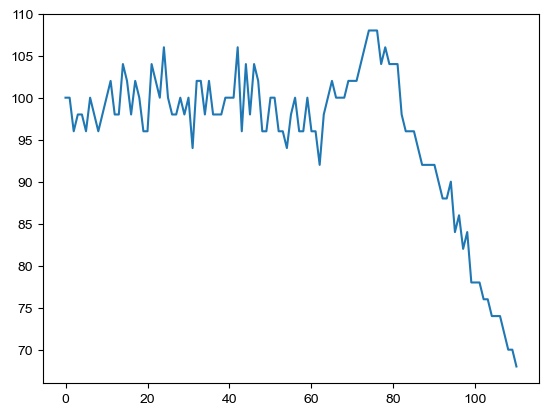

In [51]:
# 15,30,62,127
bid = final_n_bits

plt.figure()
plt.plot((encoding_matrix_dict[bid][:].sum(0)+len(encoding_matrix_dict[bid])))

In [42]:
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'human_brain_promoter_enhancer_v2')
# save encoding for now
encoding_folder = os.path.join(library_folder, 'Encoding_design')
if not os.path.exists(encoding_folder):
    print(f"Create encoding_folder: {encoding_folder}")
    os.makedirs(encoding_folder)
else:
    print(f"Use encoding_folder: {encoding_folder}")


Use encoding_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2\Encoding_design
Encoding: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2\Encoding_design\encoding_bits_total-108_on-3.pkl


In [52]:
final_n_bits = 114


In [53]:
# save
overwrite_encoding = False 

# savefile
encoding_filename = os.path.join(encoding_folder, f'encoding_bits_total-{final_n_bits}_on-{on_bits}.pkl')
print(f"Encoding: {encoding_filename}")

final_bits = convert_matrix_to_bits( encoding_matrix_dict[final_n_bits])

if not os.path.exists(encoding_filename) or overwrite_encoding:
    print("Saving encoding file")
    pickle.dump(final_bits, open(encoding_filename, 'wb'))

Encoding: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2\Encoding_design\encoding_bits_total-114_on-3.pkl
Saving encoding file
